## Gather

In [ ]:
#install module
%conda install requests
%conda install -c conda-forge tweepy
%conda install -c conda-forge jupyter_contrib_nbextensions

In [2]:
import pandas as pd
import numpy as np
import requests
import io
import datetime

In [3]:
# import twitter API
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [4]:
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
# get content from image-predictions
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r=requests.get(url)

In [6]:
# get the image-prediction dataframe
image_predictions=pd.read_csv(io.StringIO(r.content.decode('utf-8')), sep='\t')

In [7]:
# save image_predictions into tsv file
image_predictions.to_csv("image_predictions.tsv", sep="\t")

In [8]:
%%script false --no-raise-error
# above is to skip the cell from running, delete above after you input the keys below

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions, please substitute for your own keys

consumer_key = 'YOUR INPUT'
consumer_secret = 'YOUR INPUT'
access_token = 'YOUR INPUT'
access_secret = 'YOUR INPUT'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [9]:
# Save the retweet and favorite counts for each tweet ID in a new pandas DataFrame
tweet_json = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        tweet_json = tweet_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))
tweet_json = tweet_json.reset_index(drop=True)

## Access

In [10]:
# visual examination of the three dataframes
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7491,35454
1,892177421306343426,5558,30697
2,891815181378084864,3681,23091
3,891689557279858688,7665,38756
4,891327558926688256,8267,37029
...,...,...,...
2326,666049248165822465,40,96
2327,666044226329800704,125,265
2328,666033412701032449,39,109
2329,666029285002620928,41,119


In [13]:
## programmatically examine the three dataframes
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
# check name column to see if 'a' is a common mis-represent
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Blanket      1
Emma         1
Baron        1
Smiley       1
Tanner       1
Name: name, Length: 957, dtype: int64

In [18]:
# check on the sources
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# check if there are predictions that are not dogs
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [16]:
# check if there are any observations have three prediction all failed to predict it as a dog
image_predictions[(image_predictions['p1_dog'] == False) & (image_predictions['p2_dog'] == False) & (image_predictions['p3_dog'] == False)].count().tweet_id

324

In [17]:
# check out the original tweet about a tweet come out with non-dog predicts
twitter_archive.query('tweet_id == "666051853826850816"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [18]:
# check if all three dog predictions could be the same
image_predictions[(image_predictions['p1'] == image_predictions['p2']) & (image_predictions['p1'] == image_predictions['p3'])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [20]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   object
 2   favorite_count  2331 non-null   object
dtypes: object(3)
memory usage: 54.8+ KB


#### Quality (8 listed below)
#### `twitter_archive` 
- 'a' is acutally 'None' under 'name' column
- 'None' in the 'name' column should be NaN
- 'source' column should be categorized as "twitter phone", "twitter web", "twitter deck", "vine"   
- 'timestamp' column is not in datetime data type
- retweet rows are duplicated observations

#### `image_predictions`
- the column names are not clear of what it means, i.e. p1, p1_conf
- some predictions suggests that there were 324 rows of predictions that are not about dogs (all three ps are false) but instead other animals - they should be removed from the dataframe for future analytic purpose

#### `tweet_json`
- the datatype for all columns should be changed to int64


#### Tidiness (list three below)
- In `twitter_archive` table, doggo, floofer, pupper and puppo should form one column
- `tweet_json` and `image_predictions` tables are all part of the observation units from `twitter_archive`, hence all three should be combined to ones
- clean unwanted observation categories

## Clean

In [21]:
archive_clean=twitter_archive.copy()
image_clean=image_predictions.copy()
json_clean=tweet_json.copy()

#### Define quality issues from `twitter_archive` (`archive_clean`)
a. change 'a' to 'None' in column 'name'
b. change all 'None' in 'name' column to NaN  
c. replace 'source' value to "twitter phone", "twitter web", "twitter deck", "vine"  
d. change 'timestamp' column to datetime data  
e. remove the rows that is not null under the 'retweet' column  

#### Code for `archive_clean`

In [22]:
# a. change 'a' to 'None' in column 'name'
archive_clean['name'] = archive_clean['name'].replace({'a':'None'})

In [23]:
# b. change 'None' to NaN
archive_clean.loc[archive_clean.name == 'None', 'name'] = np.nan

In [24]:
# c. replace 'source' value to "tweeter phone", "tweeter web", "tweeter deck", "vine"  
archive_clean['source'] = archive_clean['source'].replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'twitter phone', 
                                       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'twitter web', 
                                       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'twitter deck', 
                                       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'vine'})

In [25]:
# d. change 'timestamp' column to datetime data  
archive_clean['timestamp'] = archive_clean.timestamp.astype(str)

In [26]:
# store datetime data in datetime column and delete timestamp column
archive_clean['datetime'] = archive_clean['timestamp'].str.split('+', n=1, expand =True)[0]
archive_clean.drop(columns =["timestamp"], inplace = True)

In [27]:
# change datetime datatype to datetime
archive_clean['datetime']=pd.to_datetime(archive_clean['datetime'])

In [29]:
# e. remove the rows that is not null under the 'retweet' column
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]

#### Test for `archive_clean`

In [30]:
# test a.
archive_clean[archive_clean['name'] == 'a'].name.sum()

0

In [31]:
# test b.
archive_clean.name.isna().sum()

735

In [32]:
# test c.
archive_clean.source.value_counts()

twitter phone    2042
vine               91
twitter web        31
twitter deck       11
Name: source, dtype: int64

In [33]:
#test d.
archive_clean['datetime'].dtypes

dtype('<M8[ns]')

In [34]:
#test e.
print(archive_clean.retweeted_status_id.notnull().sum())
print(archive_clean.retweeted_status_user_id.notnull().sum())
print(archive_clean.retweeted_status_timestamp.notnull().sum())

0
0
0


#### Define quality issues for `image_predictions` (`image_clean`)
f. change the column names 'p1/2/3' to 'prediction_1/2/3'; 'p1/2/3_conf' to 'p1/2/3_accuracy'  
g. select rows with all three ps are not dogs and drop them

#### Code for `image_predictions` (`image_clean`)

In [35]:
# f. change the column names 'p1/2/3' to 'prediction_1/2/3'; 'p1/2/3_conf' to 'p1/2/3_accuracy'
image_clean = image_clean.rename(columns={'p1':'prediction_1', 'p2':'prediction_2','p3':'prediction_3'})
image_clean = image_clean.rename(columns={'p1_conf':'p1_accuracy', 'p2_conf':'p2_accuracy','p3_conf':'p3_accuracy'})

In [36]:
# g. select rows with all three ps are not dogs and drop them
image_clean = image_clean[(image_clean['p1_dog'] == True)| (image_clean['p2_dog'] == True) | (image_clean['p3_dog'] == True)]

#### Test for `image_clean`

In [37]:
#test f.
columns = image_clean.columns.values.tolist()
columns

['tweet_id',
 'jpg_url',
 'img_num',
 'prediction_1',
 'p1_accuracy',
 'p1_dog',
 'prediction_2',
 'p2_accuracy',
 'p2_dog',
 'prediction_3',
 'p3_accuracy',
 'p3_dog']

In [38]:
# test g.
image_clean[(image_clean['p1_dog'] == False) & (image_clean['p2_dog'] == False) & (image_clean['p3_dog'] == False)].count().tweet_id

0

#### Define quality issues for `tweet_json` (`json_clean`)
h. change datatype for all columns to int64

#### Code for `json_clean`

In [39]:
json_clean ['tweet_id']= json_clean.tweet_id.astype('int64')
json_clean ['retweet_count']= json_clean.retweet_count.astype('int64')
json_clean ['favorite_count']= json_clean.favorite_count.astype('int64')

#### Test for `json_clean`

In [40]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


#### Define tidiness issues
i. create a 'dog_stage' column and merge doggo, floofer, pupper and puppo in the column  
j. combine `json_clean` and `image_clean` to `archive_clean` under column 'tweet_id'  
k. drop 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'

#### Code

In [41]:
## i. create a 'dog_stage' column and merge doggo, floofer, pupper and puppo in the column  
# handle none
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)
# merge into column
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo
archive_clean.dog_stage.value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [42]:
# handle multiple stages
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
# handle missing values
archive_clean.loc[archive_clean.dog_stage == '', 'dog_stage'] = np.nan
archive_clean = archive_clean.drop(['pupper','doggo','floofer','puppo'], axis=1)

#### Test

In [43]:
archive_clean.dog_stage.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

#### Code

In [44]:
## j. combine `json_clean` and `image_clean` to `archive_clean` under column 'tweet_id`
archive_clean = archive_clean.merge(json_clean, on = 'tweet_id', how='left')
archive_clean = archive_clean.merge(image_clean, on = 'tweet_id', how = 'left')
## k. drop unwanted columns
archive_clean=archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], axis=1)

#### Test

In [45]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   source              2175 non-null   object        
 2   text                2175 non-null   object        
 3   expanded_urls       2117 non-null   object        
 4   rating_numerator    2175 non-null   int64         
 5   rating_denominator  2175 non-null   int64         
 6   name                1440 non-null   object        
 7   datetime            2175 non-null   datetime64[ns]
 8   dog_stage           344 non-null    object        
 9   retweet_count       2168 non-null   float64       
 10  favorite_count      2168 non-null   float64       
 11  jpg_url             1686 non-null   object        
 12  img_num             1686 non-null   float64       
 13  prediction_1        1686 non-null   object      

#### Store the data

In [46]:
archive_clean.to_csv("twitter_archive_master.csv")

## Analyze

In [47]:
# three insight
df=archive_clean.copy()

In [48]:
df.datetime.max(),df.datetime.min()

(Timestamp('2017-08-01 16:23:56'), Timestamp('2015-11-15 22:32:08'))

In [49]:
df.prediction_1.value_counts()

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
                     ... 
earthstar               1
cowboy_boot             1
groenendael             1
laptop                  1
hare                    1
Name: prediction_1, Length: 214, dtype: int64

In [50]:
df.prediction_2.value_counts()

Labrador_retriever          96
golden_retriever            82
Cardigan                    72
Chihuahua                   43
Chesapeake_Bay_retriever    40
                            ..
skunk                        1
swing                        1
macaque                      1
snorkel                      1
academic_gown                1
Name: prediction_2, Length: 229, dtype: int64

In [51]:
df.prediction_3.value_counts()

Labrador_retriever    76
Chihuahua             57
golden_retriever      46
Eskimo_dog            36
kelpie                33
                      ..
pretzel                1
bagel                  1
terrapin               1
chest                  1
power_drill            1
Name: prediction_3, Length: 234, dtype: int64

#### insight 1 - Tweets about labrador and golden retrievers came up the most during Nov 2015 - Aug 2017

In [52]:
df.retweet_count.max()

75701.0

In [53]:
df.query('retweet_count == "75701"')

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,datetime,dog_stage,retweet_count,...,img_num,prediction_1,p1_accuracy,p1_dog,prediction_2,p2_accuracy,p2_dog,prediction_3,p3_accuracy,p3_dog
862,744234799360020481,twitter phone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,2016-06-18 18:26:18,doggo,75701.0,...,1.0,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [54]:
df.favorite_count.max()

152930.0

In [55]:
df.query('favorite_count == "152930"')

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,datetime,dog_stage,retweet_count,...,img_num,prediction_1,p1_accuracy,p1_dog,prediction_2,p2_accuracy,p2_dog,prediction_3,p3_accuracy,p3_dog
862,744234799360020481,twitter phone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,2016-06-18 18:26:18,doggo,75701.0,...,1.0,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


#### insight 2 - a swimming labrador had the most retweets during Nov 2015 - Aug 2017, which was also the most favorite among netizens.

In [56]:
df.rating_numerator.describe()

count    2175.000000
mean       13.215172
std        47.725696
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [57]:
df.query('rating_numerator == "1776"')

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,datetime,dog_stage,retweet_count,...,img_num,prediction_1,p1_accuracy,p1_dog,prediction_2,p2_accuracy,p2_dog,prediction_3,p3_accuracy,p3_dog
804,749981277374128128,twitter deck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,2016-07-04 15:00:45,NaN,2412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df.query('rating_numerator == "0"')

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,datetime,dog_stage,retweet_count,...,img_num,prediction_1,p1_accuracy,p1_dog,prediction_2,p2_accuracy,p2_dog,prediction_3,p3_accuracy,p3_dog
265,835152434251116546,twitter phone,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,NaN,2017-02-24 15:40:31,NaN,2934.0,...,3.0,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True
840,746906459439529985,twitter phone,"PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...,0,10,NaN,2016-06-26 03:22:31,NaN,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### insight 3 - majority of the ratings ranges from 10 to 12

## Visualize

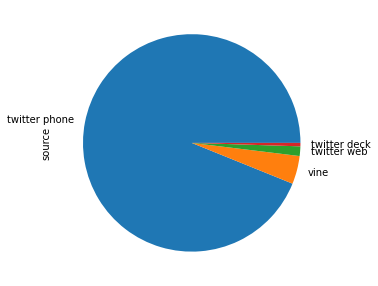

In [59]:
# where does the tweets coming from 
%matplotlib inline
source_list=df.source.value_counts()
source_list.plot.pie(figsize=(5,5))

In [60]:
source_list/source_list.sum()

twitter phone    0.938851
vine             0.041839
twitter web      0.014253
twitter deck     0.005057
Name: source, dtype: float64